<a href="https://colab.research.google.com/github/fowardelcac/Mercado-inmobilirario-cba/blob/main/Dataset/Remax/Procesamientz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/Mercado-inmobilirario-cba.git

Cloning into 'Mercado-inmobilirario-cba'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 43 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), 355.42 KiB | 2.22 MiB/s, done.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [12]:
def modelado(model, X_train, X_test, y_train):
  modelo = model.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)
  return r2_score(y_test, y_pred)

In [3]:
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error
def metricas(y_test, y_pred):
  error_max = max_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rss = mse * len(y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared = False)
  r2 = r2_score(y_test, y_pred)
  return error_max, mae, mse, rss, rmse, r2

In [15]:
data = pd.read_csv('/content/Mercado-inmobilirario-cba/Dataset/Remax/data.csv').drop('Unnamed: 0', axis=1)
tipol = pd.read_csv('/content/Mercado-inmobilirario-cba/Dataset/Remax/df_encoded_tipologia.csv').drop('Unnamed: 0', axis=1)
px = pd.read_csv('/content/Mercado-inmobilirario-cba/Dataset/Remax/Remax_df.csv')
px['Precio'] = pd.to_numeric(px['Precio'], errors='coerce')
px['Precio'] = px['Precio'].fillna(np.nan)
px['Precio'] = px['Precio'].astype(float)
data['Precio'] = px.Precio * 1000
df = pd.concat([data, tipol], axis=1, ignore_index=False).drop(['Ubicacion', 'Latitud', 'Longitud'], axis=1).dropna()
df.head(2)

,M2,M2 Cubiertos,Ambientes,Baños,Precio,casa,casa duplex,casa triplex,departamento,departamento duplex,departamento loft,departamento monoambiente,departamento penthouse,departamento piso,departamento semipiso
0,280.0,130.0,6.0,1.0,92700.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,196.0,196.0,5.0,2.0,22500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
ds = data.filter(['M2', 'M2 Cubiertos', 'Precio'], axis=1)
scaler = MinMaxScaler()
dataS = scaler.fit_transform(ds.drop('Precio', axis=1))
y_s = scaler.fit_transform(ds.filter(['Precio'], axis=1))

df = pd.DataFrame(dataS, columns=['M2', 'M2 Cubiertos'])
df['Precio'] = pd.DataFrame(y_s, columns=['Precio'])
df[['Ambientes', 'Baños']] = data[['Ambientes', 'Baños']]
df = pd.concat([df, tipol], axis=1, ignore_index=False)


In [34]:
df.dropna(inplace=True)

In [35]:
df.head()

,M2,M2 Cubiertos,Precio,Ambientes,Baños,casa,casa duplex,casa triplex,departamento,departamento duplex,departamento loft,departamento monoambiente,departamento penthouse,departamento piso,departamento semipiso
0,0.004163,0.001798,0.100996,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002839,0.002839,0.018746,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001798,0.001798,0.341535,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002334,0.001640,0.086116,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001830,0.001830,0.132982,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X = df.drop('Precio', axis=1)
y = df['Precio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.ravel()

In [37]:
modelos = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor()]
for i in modelos:
  print(modelado(i, X_train, X_test, y_train))

-0.011810521518559991
-0.3187011576331382
-0.21877884965954375


# PCA

In [38]:
pca = PCA(n_components = 2).fit(df.drop('Precio', axis=1))
data_transf = pca.transform(df.drop('Precio', axis=1))
data_transf.shape

df_final = pd.DataFrame({'PCA1': data_transf[:, 0],
                         'PCA2': data_transf[:, 1]
                         })

In [39]:
df_final

,PCA1,PCA2
0,1.008562,-0.927109
1,0.304977,0.304303
2,-1.890380,-0.156941
3,-0.924067,-0.413664
4,0.562158,1.265372
...,...,...
1749,3.712737,1.442657
1750,1.271290,0.047579
1751,-0.661338,0.561024
1752,-1.897742,-0.273112


<Axes: xlabel='columnas', ylabel='var'>

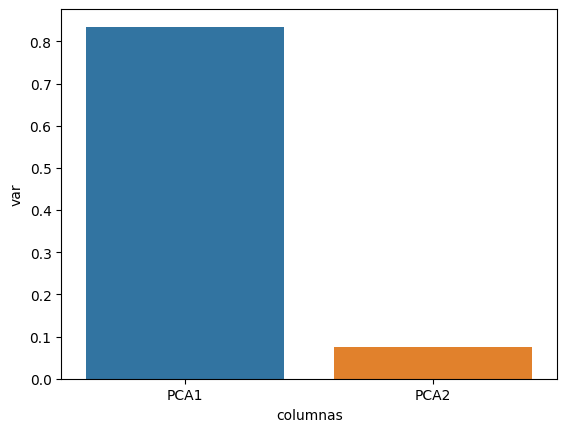

In [40]:
var_pca = pd.DataFrame({
    'columnas': ['PCA1', 'PCA2'],
    'var': pca.explained_variance_ratio_
})
sns.barplot(data = var_pca, x = 'columnas', y = 'var')

In [44]:
X = df_final.values
y = df['Precio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelos = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor()]
for i in modelos:
  print(modelado(i, X_train, X_test, y_train))

-0.0005721221810492949
-0.3476785533841076
-0.1898063771818692
